In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import keras 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

In [2]:
train_data_dir = '/content/drive/MyDrive/Tercero/Rosas/Rosas/Train'  
validation_data_dir = '/content/drive/MyDrive/Tercero/Rosas/Rosas/Test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Reescalamos las imágenes
    rotation_range=20,  # Rotación aleatoria
    zoom_range=0.2,  # Zoom aleatorio
    width_shift_range=0.2,  # Traslación horizontal aleatoria
    height_shift_range=0.2,  # Traslación vertical aleatoria
    horizontal_flip=True,
    vertical_flip=True,  # Volteo horizontal aleatorio
    preprocessing_function=preprocess_input, 
    fill_mode='nearest',
    data_format="channels_last")



valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale= 1/255)

In [4]:
train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(255, 255),
    batch_size=32
    )

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(255, 255),
    batch_size=32
    )

Found 2192 images belonging to 2 classes.
Found 596 images belonging to 2 classes.


In [ ]:
from keras.layers import Dense, Flatten 
from keras.models import Model 

In [ ]:
base_model = VGG16(input_shape= (255, 255, 3), include_top= False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(2, activation= 'softmax')(X)

#Creacion del modelo 
model = Model(base_model.input,X)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 30, verbose= 1)

mc = ModelCheckpoint(monitor = 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 30, 
                     verbose=1, 
                     save_best_only= True)

cb= [es, mc]

In [ ]:
model.compile(optimizer='adam', 
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
his = model.fit(train_generator,
                          epochs= 100,
                          verbose= 1, 
                          callbacks=cb,
                          validation_data= validation_generator,
                          steps_per_epoch=int(241/32),
                          validation_steps=int(241/32))

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.8498 - accuracy: 0.6507
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to model2VGG19.h5
7/7 [==============================] - 44s 7s/step - loss: 0.8498 - accuracy: 0.6507 - val_loss: 0.6689 - val_accuracy: 0.7500
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.7129
Epoch 2: val_accuracy improved from 0.75000 to 0.77679, saving model to model2VGG19.h5
7/7 [==============================] - 40s 6s/step - loss: 0.6544 - accuracy: 0.7129 - val_loss: 0.5279 - val_accuracy: 0.7768
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.5705 - accuracy: 0.7081
Epoch 3: val_accuracy did not improve from 0.77679
7/7 [==============================] - 40s 6s/step - loss: 0.5705 - accuracy: 0.7081 - val_loss: 0.5147 - val_accuracy: 0.7634
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.5231 - accuracy: 0.7366
Epoch 4: val_accuracy imp

In [ ]:
hit = his.history
hit.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

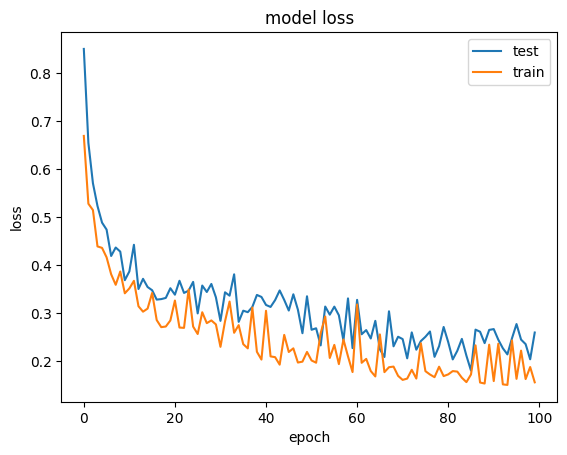

In [ ]:
h=hit
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

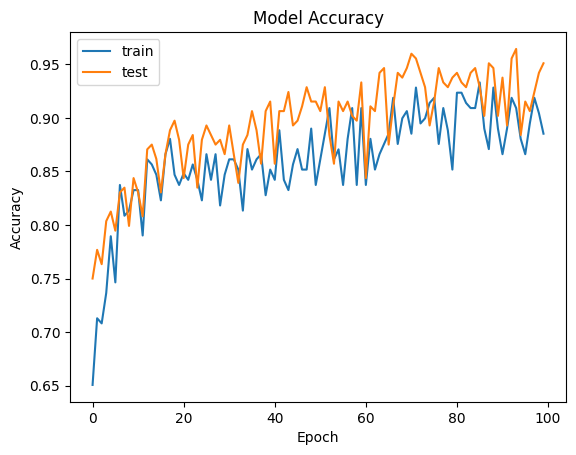

In [ ]:
# Graficar accuracy vs epochs
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 20s 2s/step


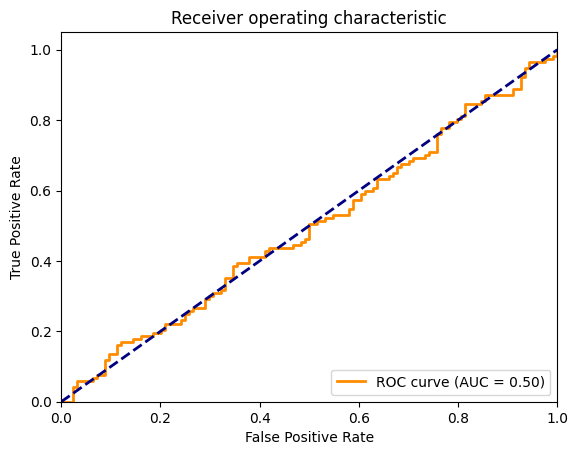

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular la probabilidad de predicción para el conjunto de validación
y_prob = model.predict(validation_generator)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(validation_generator.classes, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score, auc, roc_curve,precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix


y_true = validation_generator.classes

p = model.predict(validation_generator)
y_pred = np.argmax(p, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print('Matriz de confusión:')
print(cm)

print("\n")
y_pred = np.argmax(p, axis=1)
accuracy = accuracy_score(validation_generator.classes, y_pred)
precision = precision_score(validation_generator.classes, y_pred)
recall = recall_score(validation_generator.classes, y_pred)
f1 = f1_score(validation_generator.classes, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

8/8 [==============================] - 20s 2s/step
Matriz de confusión:
[[71 53]
 [57 60]]


Accuracy: 0.5435684647302904
Precision: 0.5309734513274337
Recall: 0.5128205128205128
F1 Score: 0.5217391304347827


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model


model = load_model("/content/drive/MyDrive/PI/best_model.h5")

1/1 [==============================] - 0s 156ms/step
preds[0]: [0. 1. 0.]
Enferma 100.0 %


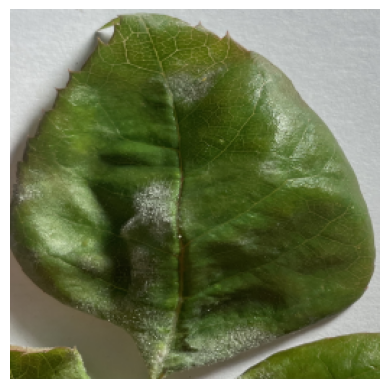

In [10]:
names = ['Sana','Enferma']
modelt = load_model("/content/drive/MyDrive/PI/best_model.h5")
imaget_path = "/content/drive/MyDrive/base_Rosas/IMG_2387.jpg"
img = cv2.imread(imaget_path)
imaget = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print('preds[0]:',preds[0])  
print(names[np.argmax(preds)],preds[0][np.argmax(preds)]*100.0,'%')
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 154ms/step
preds[0]: [0. 1. 0.]
Enferma 100.0 %


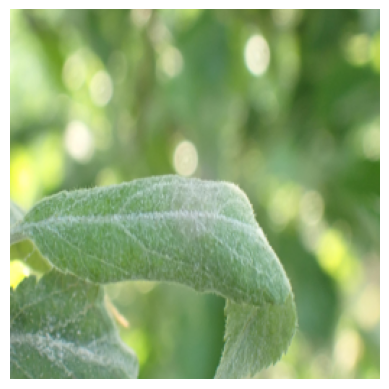

In [19]:
names = ['Sana','Enferma']
modelt = load_model("/content/drive/MyDrive/PI/best_model.h5")
imaget_path = "/content/drive/MyDrive/PI/Validation/fa5a221f9d6e2941.jpg"
img = cv2.imread(imaget_path)
imaget = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print('preds[0]:',preds[0])  
print(names[np.argmax(preds)],preds[0][np.argmax(preds)]*100.0,'%')
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 153ms/step
preds[0]: [0. 1. 0.]
Sana 100.0 %


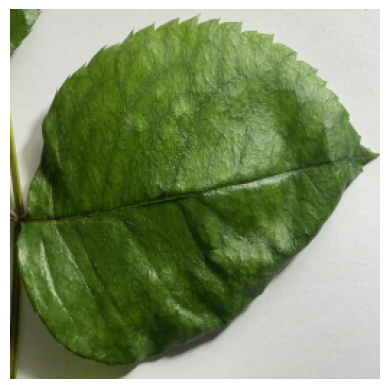

In [15]:
names = ['Enferma','Sana']
modelt = load_model("/content/drive/MyDrive/PI/best_model.h5")
imaget_path = "/content/drive/MyDrive/base_Rosas/IMG_3475.jpg"
img = cv2.imread(imaget_path)
imaget = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print('preds[0]:',preds[0])   
print(names[np.argmax(preds)],preds[0][np.argmax(preds)]*100.0,'%')
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()